### https://iq.opengenus.org/blossom-maximum-matching-algorithm/

• Алгоритм Блоссома используется для построения максимального соответствия на любом графе.

• Алгоритм Блоссома улучшает венгерский алгоритм, сокращая циклы на графе.

• Венгерский алгоритм работает только на взвешенных двудольных графах, но алгоритм Блоссома будет работать на любом графе.

• Алгоритм находит соответствие M, максимизируя количество вершин, инцидентных не более чем одному ребру в M.

• Сопоставление строится путем итеративного улучшения начального пустого сопоставления по увеличивающимся путям на графе.

• Ключевая новая идея заключается в том, что цикл нечетной длины в графе (Цветок) сжимается до одной вершины.

• Алгоритм Блоссома имеет три возможных результата после каждой итерации: максимальное соответствие, улучшение результата или обнаружение цветка.

• Цель алгоритма состоит в том, чтобы сжать цветок в один узел, чтобы выявить расширяющиеся пути.

• Время выполнения алгоритма равно O(E*V^2), а пространственная сложность составляет O(V^2).

# Теория

Алгоритм сжатия цветков, иногда называемый алгоритмом паросочетаний Эдмондса, может быть использован на любом графе для построения максимального паросочетания. Алгоритм сжатия цветков улучшает венгерский алгоритм, уменьшая циклы в графе для выявления расширяющих путей. Кроме того, венгерский алгоритм работает только на взвешенных двудольных графах, в то время как алгоритм сжатия цветков будет работать на любом графе.
Для данного общего графа G = (V, E) алгоритм находит паросочетание M так, чтобы каждая вершина в V была инцидентна не более чем одному ребру в M, и |M| было максимизировано. Паросочетание строится итеративным улучшением начального пустого паросочетания по расширяющим путям в графе. В отличие от двудольного паросочетания, ключевая новая идея заключается в том, что нечетный цикл в графе (расцвет) сжимается до одной вершины, и поиск продолжается итеративно в сжатом графе.

### Увеличивающие пути
Увеличивающий путь - это путь нечетной длины, у которого конечные точки не сопоставлены. Ребра в расширяющем пути чередуются: один сегмент будет в паросочетании, следующий сегмент не будет в паросочетании, следующий сегмент будет в паросочетании и так далее.
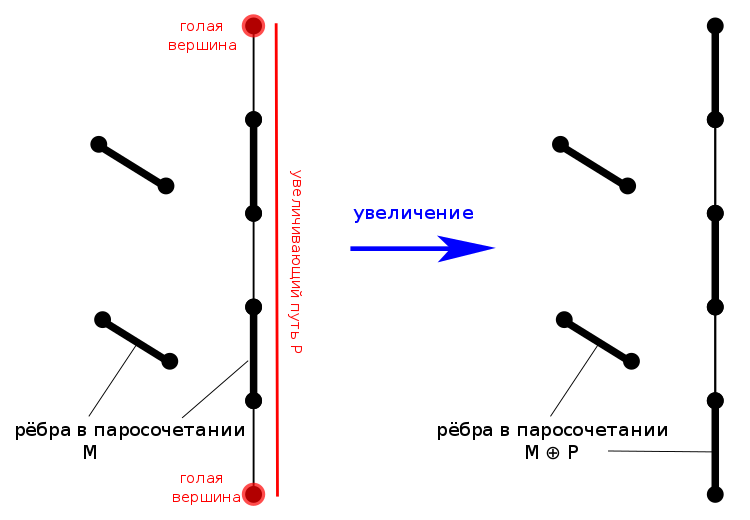

### Цветки и стягивание
Идея цветков заключается в том, что нечетный цикл в графе может быть сжат до одной вершины, чтобы поиск мог продолжаться итеративно в сжатом графе. Здесь эти нечетные циклы - это цветки.
Цветок - это цикл в G, состоящий из 2k + 1 рёбер, из которых ровно k ребер принадлежат паросочетанию M, и где одна из вершин в цикле (основная) такова, что существует чередующийся путь четной длины, называемый стеблем, от v к выставленной вершине u.
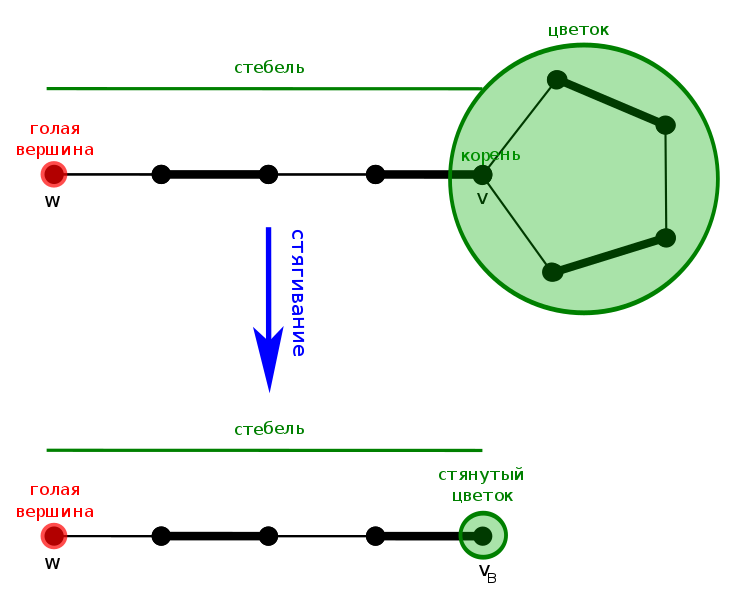

# Реализация

### Алгоритм сжатия цветков

In [33]:
import numpy as np

# Алгоритм Эдмондса по поиску максимального паросочетания
# Аргумент:
	# g: Матрица смежности графа
# Возвращает:
	# 1. матрица смежности максимального паросочетания
	# 2. массив смежности максимального паросочетания
	# 3. количество паросочетания
def edmonds_blossom_algorithm(g):
	n = len(g)

	result = np.zeros((n,n))
	match = np.full(n,-1)

	father = np.full(n,-1)
	base = np.full(n,-1)
	q =	np.full(n,0)

	inq = np.full(n,False)
	inb = np.full(n,False)
	inp = np.full(n,False)
	
	match_counts = 0
	qh = qt = 0

    # Находит LCA (наименьший общий предок) двух вершин в дереве графа
	def find_lca(root, u, v):
		inp.fill(False)

		while True:
			u = base[u]

			inp[u] = True

			if u == root:
				break

			u = father[match[u]]

		while True:
			v = base[v]

			if inp[v]:
				return v
			else:
				v = father[match[v]]

    # Помечает цветок в графе, созданный увеличивающим путём путем
	def mark_blossom(lca, u):
		while base[u] != lca:
			v = match[u]

			inb[base[u]] = inb[base[v]] = True

			u = father[v]

			if (base[u] != lca):
				father[u] = v

    # Сжимает цветок в графе
	def blossom_contraction(s, u, v):
		global qt, qh

		lca = find_lca(s, u, v)

		inb.fill(False)

		mark_blossom(lca, u)
		mark_blossom(lca, v)

		if base[u] != lca:
			father[u] = v

		if base[v] != lca:
			father[v] = u

		for u in range(n):
			if inb[base[u]]:
				base[u] = lca

				if not inq[u]:
					qt += 1
					q[qt] = u
					inq[u] = True

    # Находит увеличивающий путь в графе
	def find_augmenting_path(s):
		global qt, qh
		
		inq.fill(0)
		father.fill(-1)

		base[:] = np.arange(n)

		qh = qt = 0
		q[0] = s
		inq[s] = True

		while qh <= qt:
			u = q[qh]

			qh += 1

			for v in range(n):
				if g[u][v] == 0:
					continue
				
				if base[u] != base[v] and match[u] != v:
					if (v == s) or (match[v] != -1 and father[match[v]] != -1):
						blossom_contraction(s, u, v)
					elif father[v] == -1:
						father[v] = u

						if match[v] == -1:
							return v
						
						elif not inq[match[v]]:
							qt += 1
							q[qt] = match[v]
							inq[q[qt]] = True
							
		return -1
		
    # Увеличивает паросочетание в графе
	def augment_path(t):
		u = t
		v = w = 0
		
		while u != -1:
			v = father[u]
			w = match[v]

			match[v] = u
			match[u] = v

			u = w

		return t != -1

	# Преобразование рекурсивного алгоритма в итеративную версию для упрощения
	for u in range(n):
		if match[u] == -1:
			match_counts += augment_path(find_augmenting_path(u))

	for v in range(n):
		if match[v] != -1:
			result[match[v]][v] = result[v][match[v]] = g[match[v]][v]

	# result: матрица смежности максимального паросочетания
	# match: массив смежности максимального паросочетания
	# match_counts: количество паросочетания
	return result, match, match_counts


### Отрисовка графа

In [34]:
import matplotlib.pyplot as plt

def show_graph(g):
	plt.figure()

	n = len(g)
	step = 2*np.pi/n

	for i in range(n):
		plt.text(np.cos(i*step) * 1.1,np.sin(i*step) * 1.1,i,ha = 'center',va = 'center')

		for j in range(i + 1, n):
			if g[i][j] != 0:
				plt.plot(
					[np.cos(i*step),np.cos(j*step)],
					[np.sin(i*step),np.sin(j*step)],
					color= 'red' if g[i][j] > 1 else 'black',
					ls='-',
					marker='',
					linewidth = abs(g[i][j])
				)

		plt.plot(np.cos(i*step),np.sin(i*step),'o',color = 'black')
				
	plt.axis('off')

### Пример на конкретном графе

4

array([ 1,  0,  3,  2,  5,  4,  7,  6, -1])

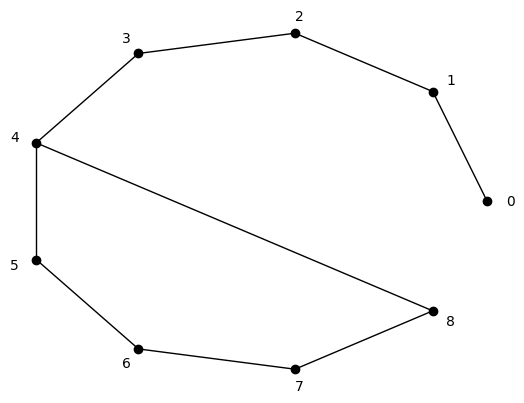

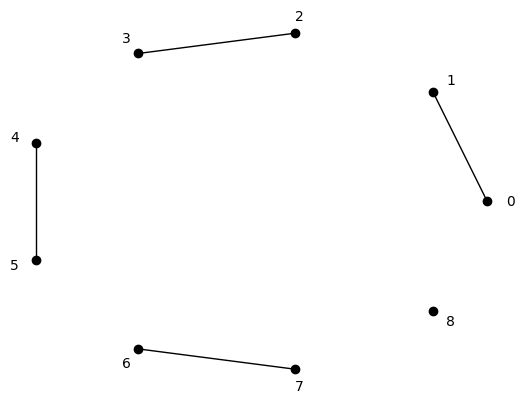

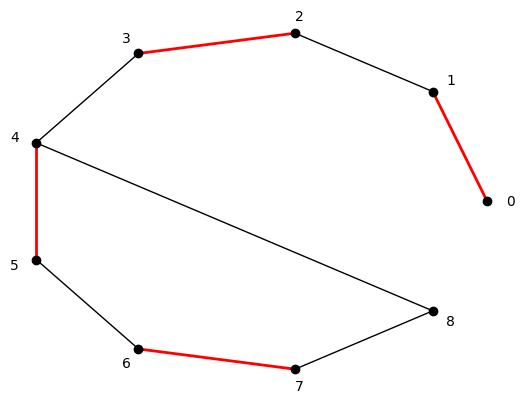

In [35]:
graph = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0],
				[1, 0, 1, 0, 0, 0, 0, 0, 0],
				[0, 1, 0, 1, 0, 0, 0, 0, 0],
				[0, 0, 1, 0, 1, 0, 0, 0, 0],
				[0, 0, 0, 1, 0, 1, 0, 0, 1],
				[0, 0, 0, 0, 1, 0, 1, 0, 0],
				[0, 0, 0, 0, 0, 1, 0, 1, 0],
				[0, 0, 0, 0, 0, 0, 1, 0, 1],
				[0, 0, 0, 0, 1, 0, 0, 1, 0]])

show_graph(graph)

result,match,count = edmonds_blossom_algorithm(graph)

display(count,match)

show_graph(result)

show_graph(graph + result)

### Пример на случайном графе

In [36]:
import numpy.random as rnd

def random_graph(n):
	g = rnd.randint(0, 2, size=(n, n))
	g = np.triu(g) + np.triu(g, 1).T
	np.fill_diagonal(g, 0)
	return g

9

array([ 1,  0,  3,  2, 15, 14,  8, 12,  6, 10,  9, 13,  7, 11,  5,  4, 17,
       16, -1])

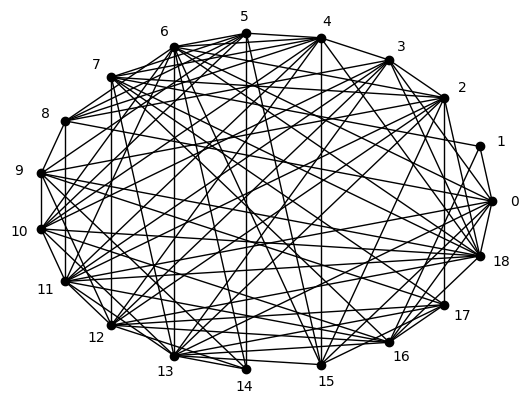

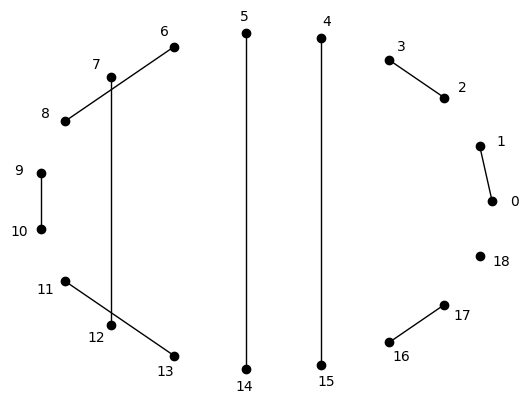

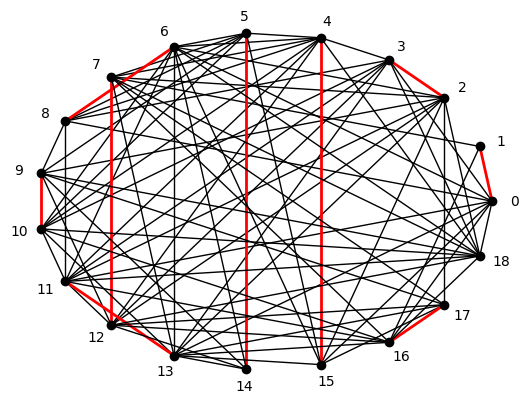

In [43]:
graph = random_graph(19)

show_graph(graph)

result,match,count = edmonds_blossom_algorithm(graph)

display(count,match)

show_graph(result)

show_graph(graph + result)

# Приложение

### Условие
Во первых, стоит отметить, что в случае, когда граф - произвольный, а не двудольный, его вершины это объекты одного рода, то есть равносильные друг другу. В то время как в двудольном графе можно считать, что объекты в одной доле из одного класса объектов, а во второй из другой. Например: вакансии на должности и их претенденты. Претенденты не могут претендовать на друг друга, а на вакансию не может претендовать другая вакансия.

### Задача
Пусть есть мероприятие и его организатор (Он может как быть участником собственного мероприятия, так и не быть), где люди зарегестрированы через социальную сеть ВКонтакте или любую другую, где есть доступ к списку участников и проверки подписаны ли они друг на друга. Для мероприятия свойствено приглашать друзей, поскольку, на нём будет проводится интерактив с публикой с работой в парах. Таким образом организатор пригласил своих друзей, друзья пригласили своих друзей и так набролось куча народу. Возможно такое, что пришли друзья, которые уже у кого-то в друзьях из участников. Все они подписаны на паблик встречи и организатор имеет полный доступ к списку участников. Я не учитываю односторонних подписчиков, а только тех кто добавили друг друга взаимно. В начале мероприятие будет оглашён список пар и проводится интерактив.

### Модель
Я получил неоринтированный невзвешенный граф, где вершины - пользователи ВК (участники мероприятия), а связи в графе - наличие взаимной подписки в социальной сети. Распределяю по парам людей, которые друг у друга в друзьях, с помощью алгоритма чтобы удачно провести мероприятие и не тратить силы на перерасчёт, так как могут резко могут появится новые люди. Те, кто остались без пары будут случайно распределены между друг другом. Если остался единственный участник без пары, пусть ему будет дана особая роль на усмотрение организатора.